In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [3]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [4]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)          # no activation and no softmax at the end(included in nn.CrossEntropyLoss())
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [5]:
# Training the model

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.reshape(-1, 28*28).to(device)       # original shape: [100, 1, 28, 28], resized: [100, 784]
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.4427
Epoch [1/2], Step [200/600], Loss: 0.2515
Epoch [1/2], Step [300/600], Loss: 0.2896
Epoch [1/2], Step [400/600], Loss: 0.2352
Epoch [1/2], Step [500/600], Loss: 0.1612
Epoch [1/2], Step [600/600], Loss: 0.1594
Epoch [2/2], Step [100/600], Loss: 0.0883
Epoch [2/2], Step [200/600], Loss: 0.0581
Epoch [2/2], Step [300/600], Loss: 0.0672
Epoch [2/2], Step [400/600], Loss: 0.2282
Epoch [2/2], Step [500/600], Loss: 0.1174
Epoch [2/2], Step [600/600], Loss: 0.1289


In [6]:
# Testing the model

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)           # max returns (value ,index)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print('Number of test samples: ',n_samples)
    print('Number of correct predictions: ', n_correct)
    print(f'Accuracy of the network on the {n_samples} test images: {acc} %')

Number of test samples:  10000
Number of correct predictions:  9672
Accuracy of the network on the 10000 test images: 96.72 %


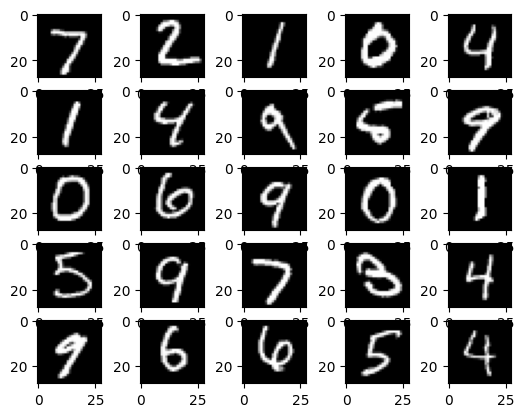

Predicted           Targets
7 2 1 0 4           7 2 1 0 4 
1 4 9 6 9           1 4 9 5 9 
0 6 9 0 1           0 6 9 0 1 
5 9 7 3 4           5 9 7 3 4 
9 6 6 5 4           9 6 6 5 4 


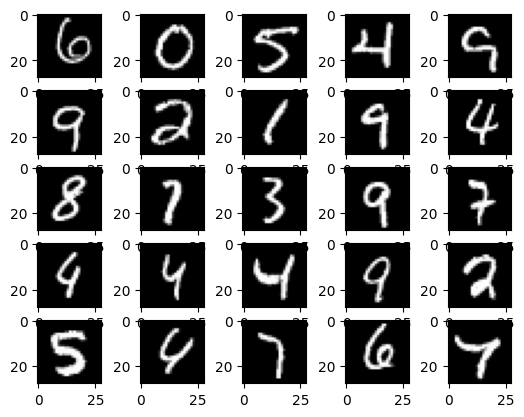

Predicted           Targets
6 0 5 4 9           6 0 5 4 9 
9 2 1 9 4           9 2 1 9 4 
8 7 3 9 7           8 7 3 9 7 
4 4 4 9 2           4 4 4 9 2 
5 4 7 6 7           5 4 7 6 7 


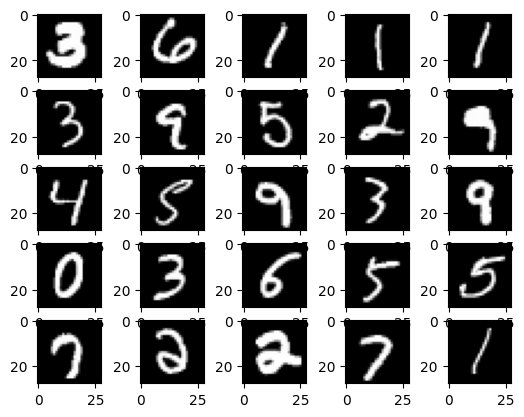

Predicted           Targets
3 6 1 1 1           3 6 1 1 1 
3 9 5 2 9           3 9 5 2 9 
4 5 9 3 9           4 5 9 3 9 
0 3 6 5 5           0 3 6 5 5 
7 2 2 7 1           7 2 2 7 1 


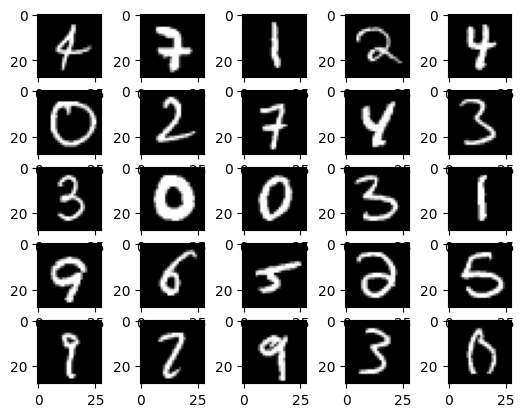

Predicted           Targets
4 7 1 2 4           4 7 1 2 4 
0 2 7 4 3           0 2 7 4 3 
3 0 0 3 1           3 0 0 3 1 
9 6 5 2 5           9 6 5 2 5 
9 7 9 3 0           9 2 9 3 0 


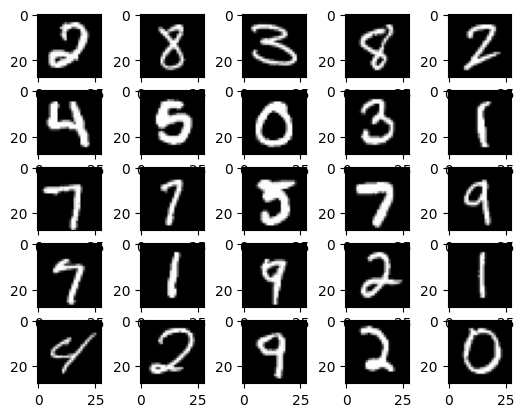

Predicted           Targets
2 8 3 8 2           2 8 3 8 2 
4 5 0 3 1           4 5 0 3 1 
7 7 3 7 9           7 7 5 7 9 
7 1 9 2 1           7 1 9 2 1 
4 2 9 2 0           4 2 9 2 0 


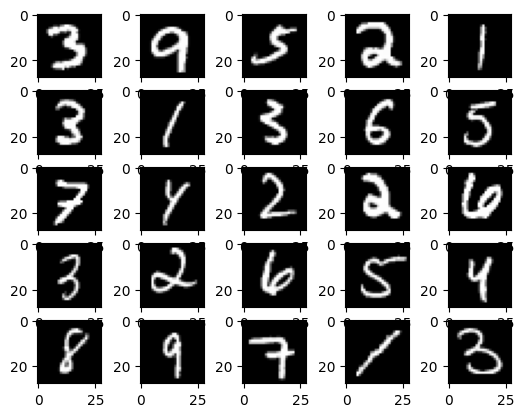

Predicted           Targets
3 9 5 2 1           3 9 5 2 1 
3 1 3 6 5           3 1 3 6 5 
7 4 2 2 6           7 4 2 2 6 
3 2 6 5 4           3 2 6 5 4 
8 9 7 1 3           8 9 7 1 3 


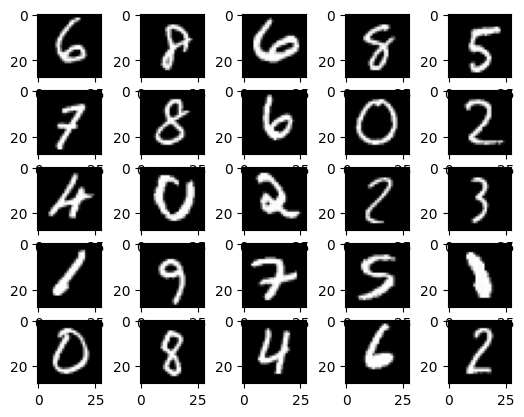

Predicted           Targets
6 8 6 8 5           6 8 6 8 5 
7 8 6 0 2           7 8 6 0 2 
6 0 2 2 3           4 0 2 2 3 
1 9 7 5 8           1 9 7 5 1 
0 8 4 6 2           0 8 4 6 2 


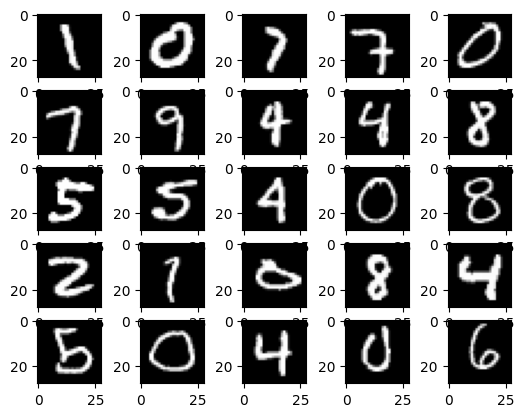

Predicted           Targets
1 0 7 7 0           1 0 7 7 0 
7 9 9 4 8           7 9 4 4 8 
5 5 4 0 8           5 5 4 0 8 
2 1 0 8 4           2 1 0 8 4 
5 0 4 0 6           5 0 4 0 6 


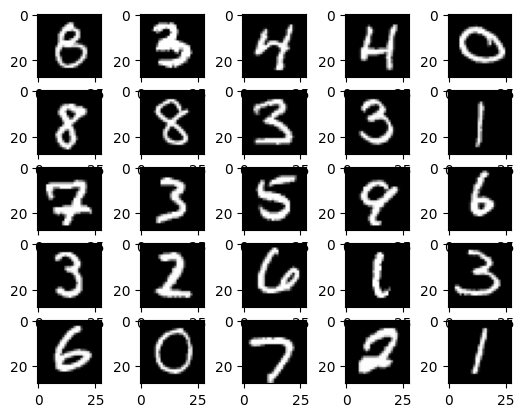

Predicted           Targets
8 3 4 4 0           8 3 4 4 0 
8 8 3 3 1           8 8 3 3 1 
2 3 5 9 6           7 3 5 9 6 
3 2 6 1 3           3 2 6 1 3 
6 0 7 2 1           6 0 7 2 1 


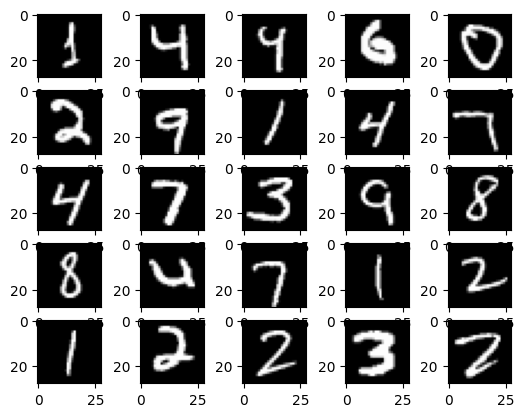

Predicted           Targets
3 4 4 6 0           1 4 4 6 0 
2 9 1 4 7           2 9 1 4 7 
4 7 3 9 8           4 7 3 9 8 
8 4 7 1 2           8 4 7 1 2 
1 2 2 3 2           1 2 2 3 2 


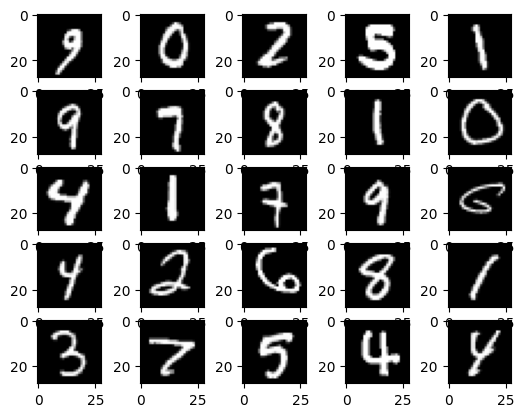

Predicted           Targets
9 0 2 5 1           9 0 2 5 1 
9 7 8 1 0           9 7 8 1 0 
4 1 7 9 5           4 1 7 9 6 
4 2 6 8 1           4 2 6 8 1 
3 7 5 4 4           3 7 5 4 4 


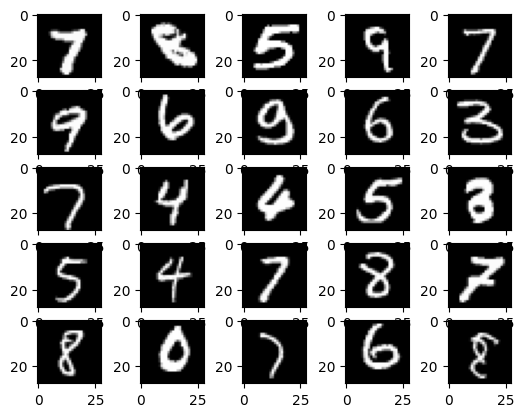

Predicted           Targets
7 8 5 9 7           7 8 5 9 7 
9 6 3 6 3           9 6 9 6 3 
7 4 6 5 3           7 4 4 5 3 
5 4 7 8 7           5 4 7 8 7 
8 0 7 6 8           8 0 7 6 8 


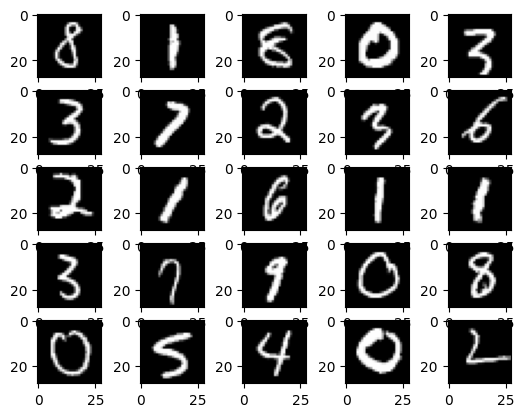

Predicted           Targets
3 1 8 0 3           8 1 8 0 3 
3 7 2 3 6           3 7 2 3 6 
2 1 6 1 1           2 1 6 1 1 
3 7 9 0 8           3 7 9 0 8 
0 5 4 0 2           0 5 4 0 2 


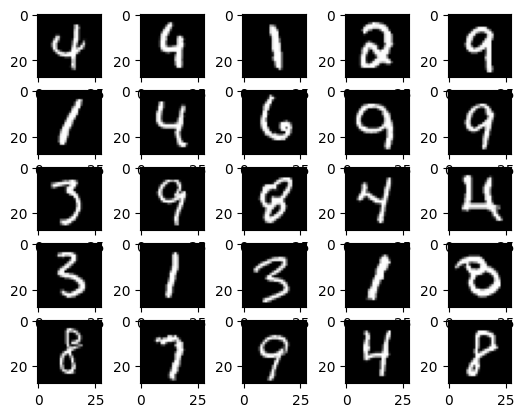

Predicted           Targets
4 4 1 2 9           4 4 1 2 9 
1 4 6 9 9           1 4 6 9 9 
3 9 8 4 4           3 9 8 4 4 
3 1 3 1 3           3 1 3 1 8 
8 7 9 4 8           8 7 9 4 8 


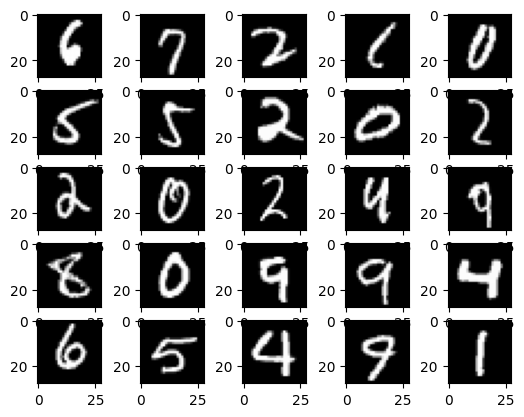

Predicted           Targets
6 7 2 1 0           6 7 2 1 0 
5 5 2 0 2           5 5 2 0 2 
2 0 2 4 9           2 0 2 4 9 
8 0 9 9 4           8 0 9 9 4 
6 5 4 9 1           6 5 4 9 1 


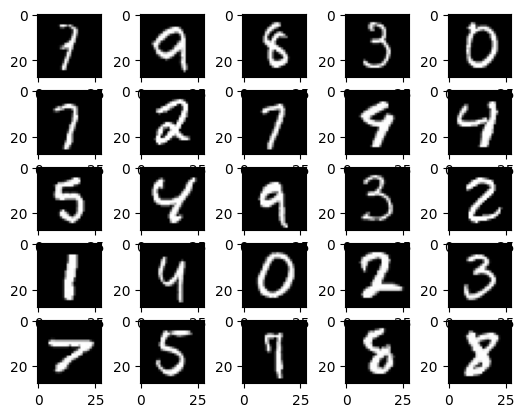

Predicted           Targets
1 9 8 3 0           7 9 8 3 0 
7 2 7 9 4           7 2 7 9 4 
5 4 9 3 2           5 4 9 3 2 
1 4 0 2 3           1 4 0 2 3 
7 5 9 8 8           7 5 7 8 8 


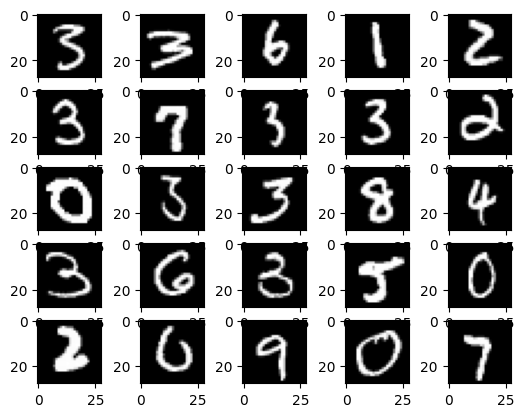

Predicted           Targets
3 3 6 1 2           3 3 6 1 2 
3 7 3 3 6           3 7 3 3 2 
0 3 3 8 4           0 3 3 8 4 
3 6 3 5 0           3 6 3 5 0 
2 0 9 0 7           2 0 9 0 7 


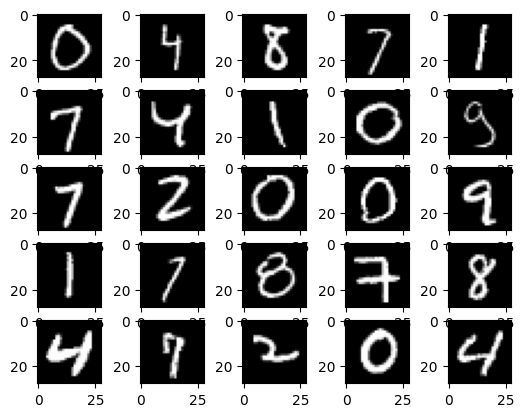

Predicted           Targets
0 4 8 7 1           0 4 8 7 1 
7 4 1 0 3           7 4 1 0 9 
7 2 0 0 9           7 2 0 0 9 
1 7 0 7 8           1 7 8 7 8 
4 7 2 0 4           4 7 2 0 4 


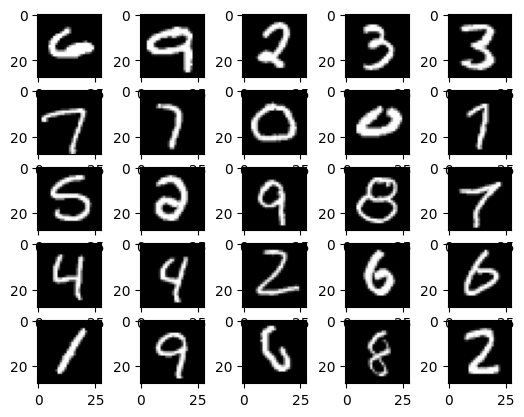

Predicted           Targets
4 9 2 3 3           6 9 2 3 3 
7 7 0 0 7           7 7 0 0 7 
5 2 9 8 7           5 2 9 8 7 
4 4 2 6 6           4 4 2 6 6 
1 9 6 8 2           1 9 6 8 2 


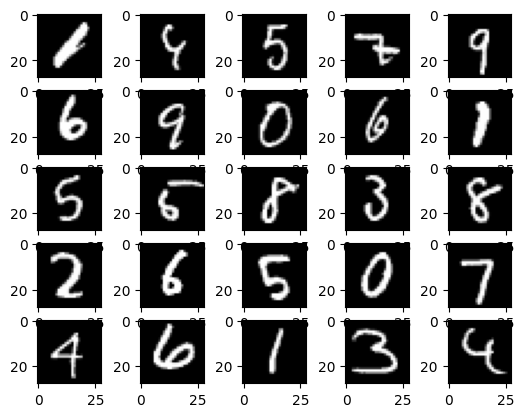

Predicted           Targets
1 4 5 7 9           1 9 5 7 9 
6 9 0 6 1           6 9 0 6 1 
5 5 8 3 8           5 5 8 3 8 
2 6 5 0 7           2 6 5 0 7 
4 6 1 3 4           4 6 1 3 4 


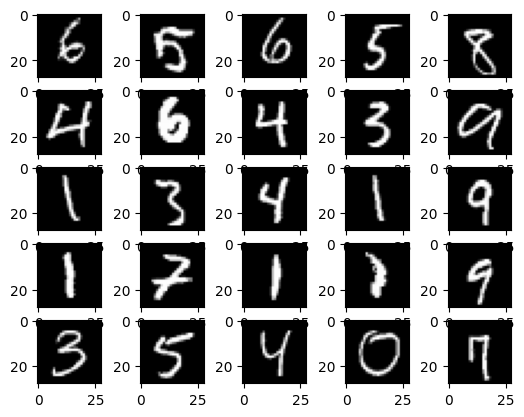

Predicted           Targets
6 5 6 5 3           6 5 6 5 8 
4 6 4 3 9           4 6 4 3 9 
1 3 4 1 9           1 3 4 1 9 
1 2 1 1 9           1 7 1 1 9 
3 5 4 0 9           3 5 4 0 7 


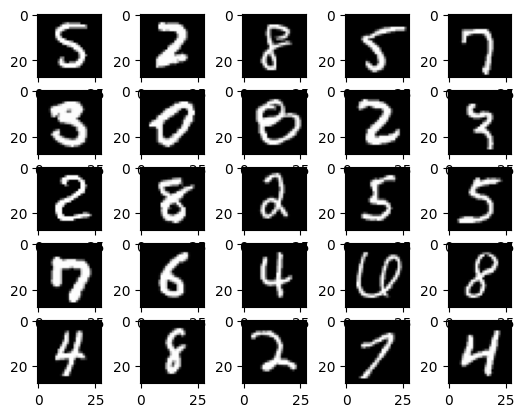

Predicted           Targets
5 2 8 5 7           5 2 8 5 7 
3 0 8 2 7           3 0 8 2 3 
2 8 2 5 5           2 8 2 5 5 
7 6 4 0 8           7 6 4 6 8 
4 8 2 7 4           4 8 2 7 4 


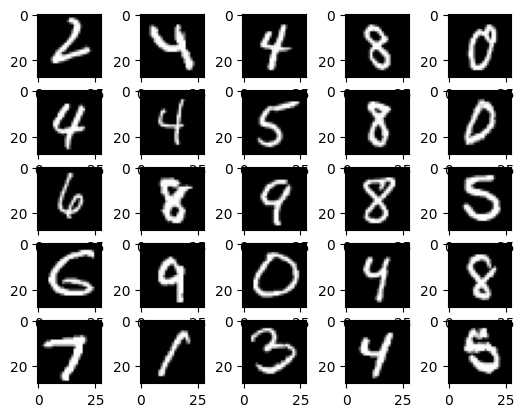

Predicted           Targets
2 4 4 8 0           2 4 4 8 0 
4 4 5 8 0           4 4 5 8 0 
6 8 9 8 5           6 8 9 8 5 
6 9 0 4 8           6 9 0 4 8 
7 1 3 4 8           7 1 3 4 5 


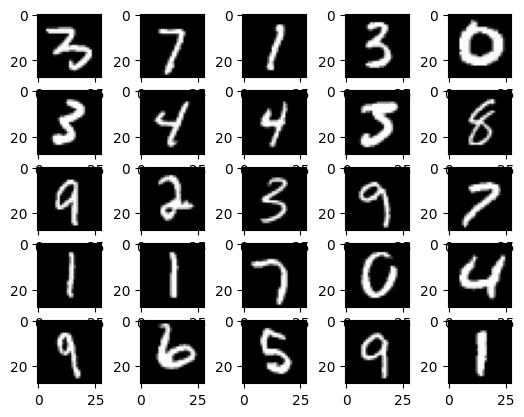

Predicted           Targets
3 7 1 3 0           3 7 1 3 0 
3 4 4 3 8           3 4 4 3 8 
9 2 3 9 7           9 2 3 9 7 
1 1 7 0 4           1 1 7 0 4 
9 6 5 9 1           9 6 5 9 1 


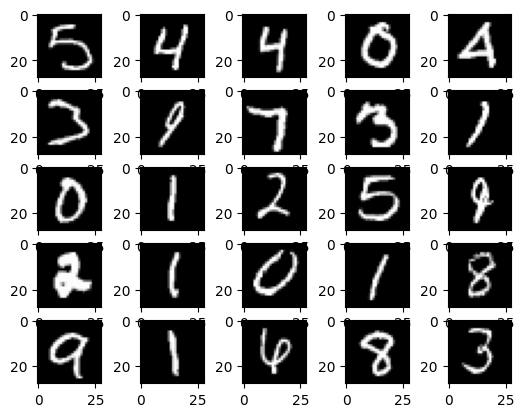

Predicted           Targets
5 4 4 0 4           5 4 4 0 4 
3 1 7 3 1           3 9 7 3 1 
0 1 2 5 4           0 1 2 5 9 
2 1 0 1 8           2 1 0 1 8 
9 1 4 8 3           9 1 6 8 3 


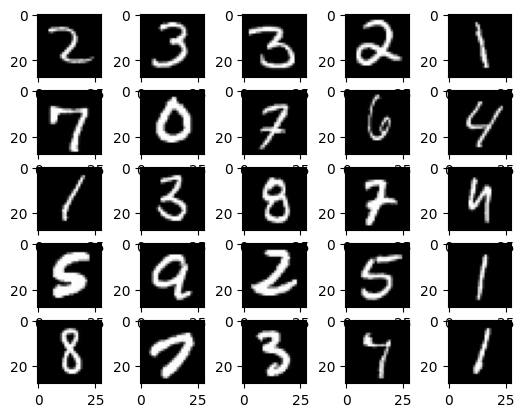

Predicted           Targets
2 3 3 2 1           2 3 3 2 1 
7 0 7 6 4           7 0 7 6 4 
1 3 8 7 4           1 3 8 7 4 
5 9 2 5 1           5 9 2 5 1 
8 7 3 7 1           8 7 3 7 1 


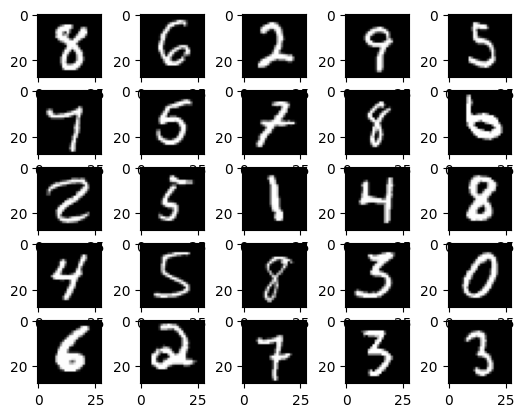

Predicted           Targets
8 6 2 9 5           8 6 2 9 5 
7 5 1 8 6           7 5 7 8 6 
2 5 1 4 8           2 5 1 4 8 
4 5 8 3 0           4 5 8 3 0 
6 2 7 3 3           6 2 7 3 3 


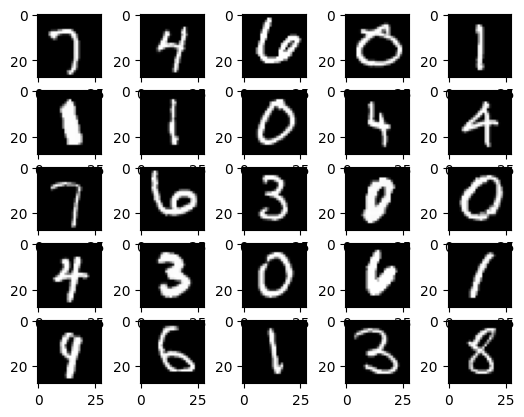

Predicted           Targets
7 4 6 0 1           7 4 6 0 1 
1 1 0 4 4           1 1 0 4 4 
7 6 3 0 0           7 6 3 0 0 
4 3 0 6 1           4 3 0 6 1 
9 6 1 3 8           9 6 1 3 8 


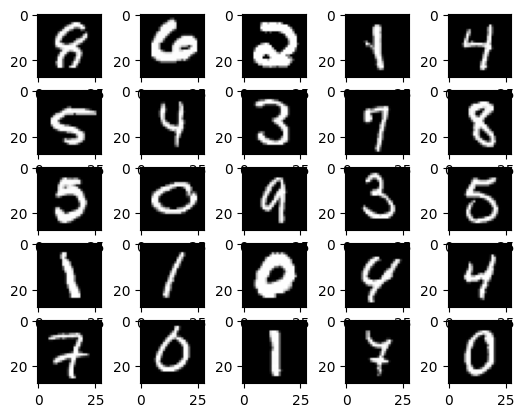

Predicted           Targets
8 6 2 1 4           8 6 2 1 4 
5 4 3 7 8           5 4 3 7 8 
3 0 9 3 5           5 0 9 3 5 
1 1 0 4 4           1 1 0 4 4 
7 0 1 7 0           7 0 1 7 0 


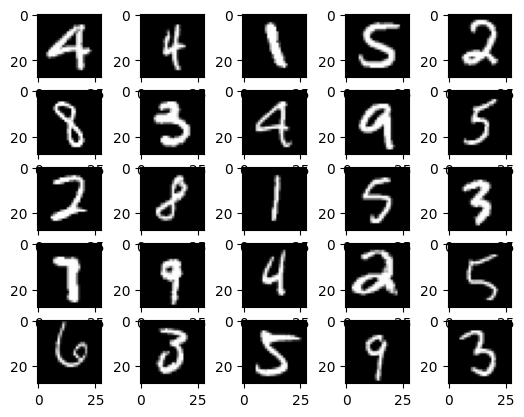

Predicted           Targets
4 4 1 5 2           4 4 1 5 2 
8 3 4 9 5           8 3 4 9 5 
2 8 1 5 3           2 8 1 5 3 
3 9 4 2 5           7 9 4 2 5 
6 2 5 9 3           6 3 5 9 3 


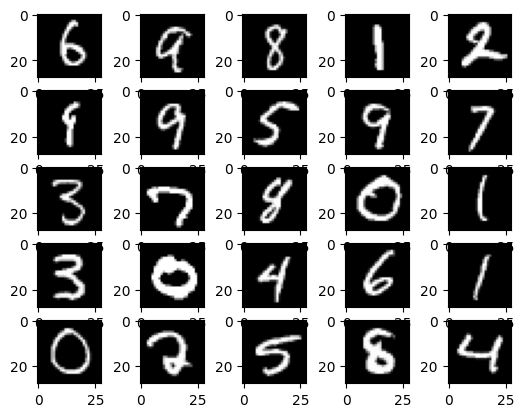

Predicted           Targets
6 9 8 1 2           6 9 8 1 2 
1 9 5 9 7           9 9 5 9 7 
3 7 8 0 1           3 7 8 0 1 
3 0 4 6 1           3 0 4 6 1 
0 2 5 8 4           0 2 5 8 4 


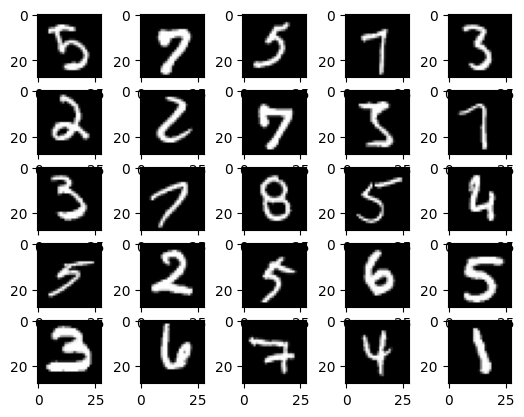

Predicted           Targets
5 7 5 7 3           5 7 5 7 3 
2 2 7 3 7           2 2 7 3 7 
3 7 8 5 6           3 7 8 5 4 
5 2 9 6 5           5 2 5 6 5 
3 6 7 4 1           3 6 7 4 1 


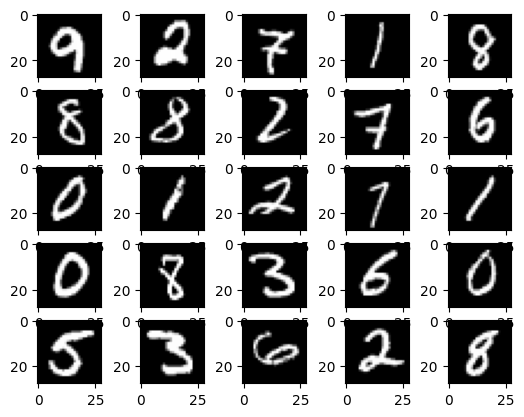

Predicted           Targets
9 2 7 1 8           9 2 7 1 8 
8 3 2 7 6           8 8 2 7 6 
0 1 2 7 1           0 1 2 7 1 
0 8 3 6 0           0 8 3 6 0 
5 3 6 2 8           5 3 6 2 8 


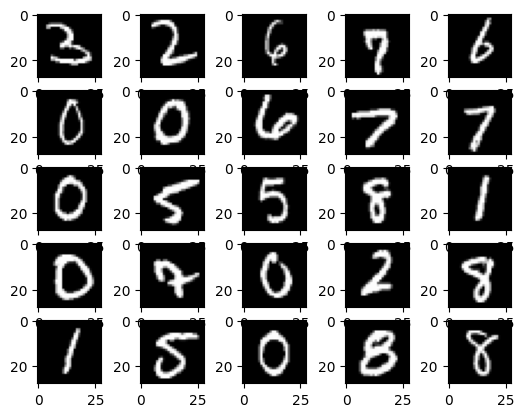

Predicted           Targets
3 2 6 7 6           3 2 6 7 6 
0 0 6 7 7           0 0 6 7 7 
0 5 5 8 1           0 5 5 8 1 
0 7 0 2 8           0 7 0 2 8 
1 5 0 8 8           1 5 0 8 8 


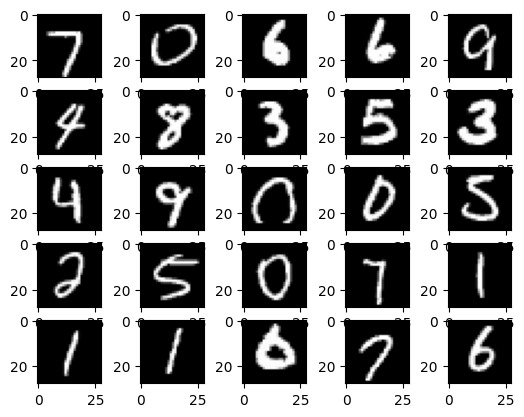

Predicted           Targets
7 0 6 6 9           7 0 6 6 9 
4 8 3 5 3           4 8 3 5 3 
4 9 0 0 5           4 9 0 0 5 
2 5 0 7 1           2 5 0 7 1 
1 1 0 7 6           1 1 6 7 6 


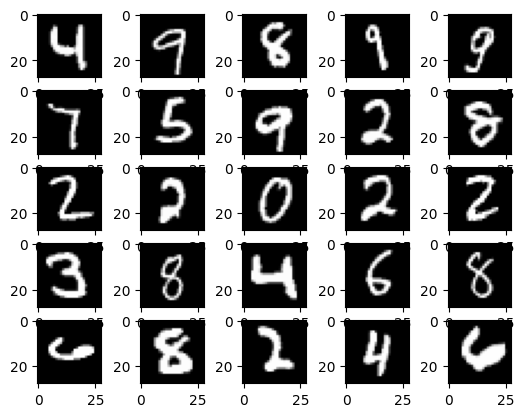

Predicted           Targets
4 9 8 1 9           4 9 8 9 9 
7 5 9 2 8           7 5 9 2 8 
2 2 0 2 2           2 2 0 2 2 
3 8 4 6 8           3 8 4 6 8 
4 8 2 4 6           6 8 2 4 6 


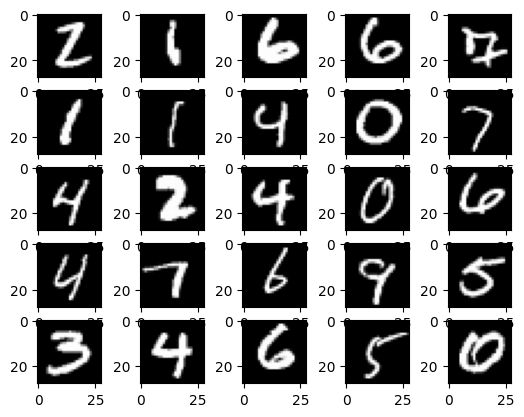

Predicted           Targets
2 1 6 6 0           2 1 6 6 7 
1 1 4 0 7           1 1 4 0 7 
4 2 4 0 6           4 2 4 0 6 
4 7 6 9 5           4 7 6 9 5 
3 4 6 5 0           3 4 6 5 0 


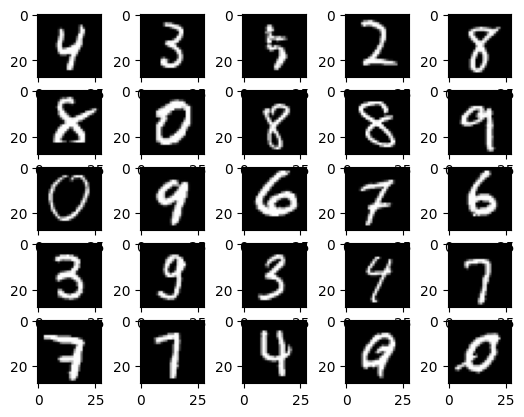

Predicted           Targets
4 3 3 2 8           4 3 5 2 8 
8 0 8 8 9           8 0 8 8 9 
0 9 6 7 6           0 9 6 7 6 
3 3 3 9 7           3 9 3 4 7 
7 7 4 9 0           7 7 4 9 0 


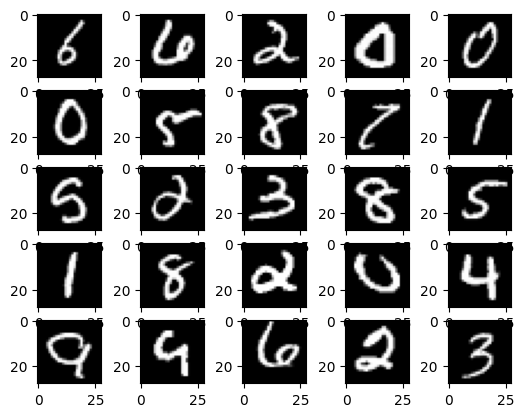

Predicted           Targets
6 6 2 0 0           6 6 2 0 0 
0 5 8 3 1           0 5 8 7 1 
5 3 3 8 5           5 2 3 8 5 
1 8 2 0 4           1 8 2 0 4 
9 9 6 2 3           9 9 6 2 3 


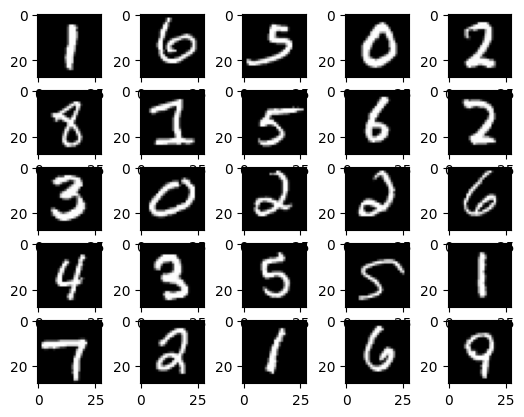

Predicted           Targets
1 6 3 0 2           1 6 5 0 2 
8 3 5 6 2           8 1 5 6 2 
3 0 2 2 6           3 0 2 2 6 
4 3 5 5 1           4 3 5 5 1 
7 2 1 6 9           7 2 1 6 9 


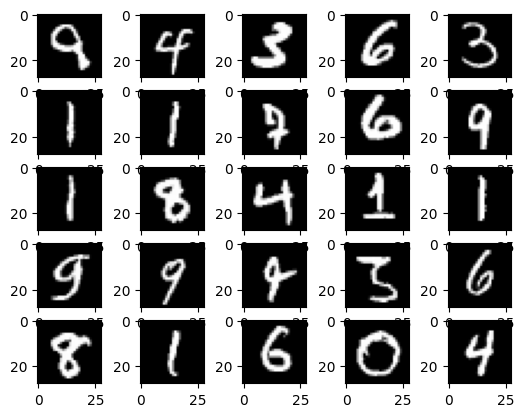

Predicted           Targets
9 4 3 6 3           9 4 3 6 3 
1 1 7 6 9           1 1 7 6 9 
1 8 4 1 1           1 8 4 1 1 
9 9 4 3 6           9 9 4 3 6 
8 1 6 0 4           8 1 6 0 4 


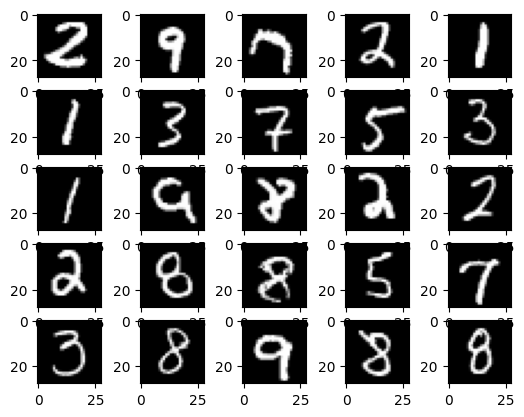

Predicted           Targets
2 9 7 2 1           2 9 7 2 1 
1 3 7 5 3           1 3 7 5 3 
1 9 8 2 2           1 9 8 2 2 
2 8 8 5 7           2 8 8 5 7 
3 8 9 8 8           3 8 9 8 8 


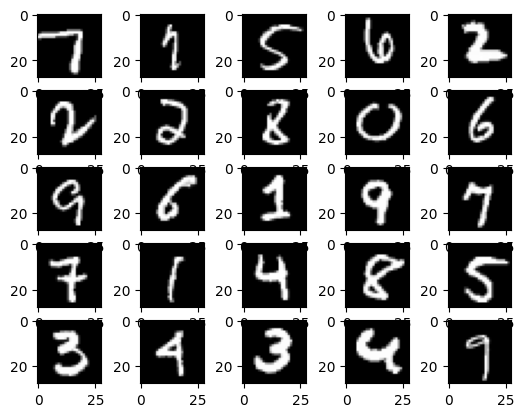

Predicted           Targets
7 1 5 6 2           7 1 5 6 2 
2 2 8 0 6           2 2 8 0 6 
9 6 1 9 7           9 6 1 9 7 
7 1 4 8 5           7 1 4 8 5 
3 4 3 4 7           3 4 3 4 9 


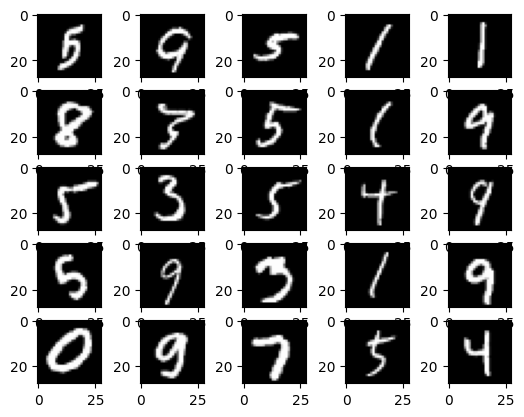

Predicted           Targets
5 9 5 1 1           5 9 5 1 1 
8 7 5 1 9           8 3 5 1 9 
5 3 5 4 9           5 3 5 4 9 
5 9 3 1 9           5 9 3 1 9 
0 9 7 5 4           0 9 7 5 4 


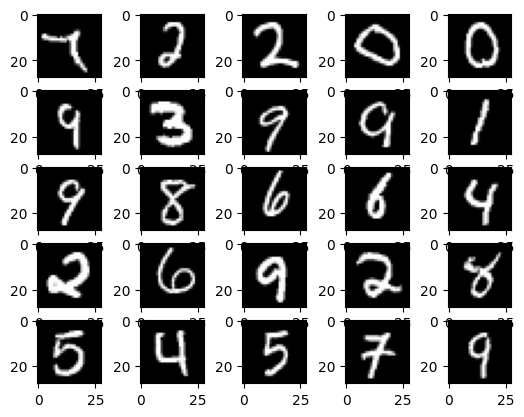

Predicted           Targets
7 2 2 0 0           7 2 2 0 0 
9 3 9 9 1           9 3 9 9 1 
9 8 6 6 4           9 8 6 6 4 
2 6 9 2 8           2 6 9 2 8 
5 4 5 7 9           5 4 5 7 9 


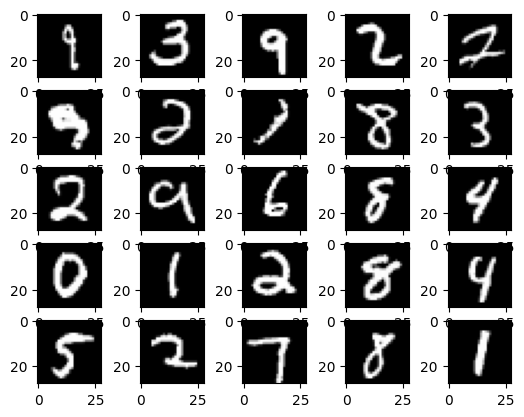

Predicted           Targets
9 3 9 2 2           9 3 9 2 2 
9 2 1 8 3           9 2 1 8 3 
2 9 6 8 4           2 9 6 8 4 
0 1 2 8 4           0 1 2 8 4 
5 2 7 8 1           5 2 7 8 1 


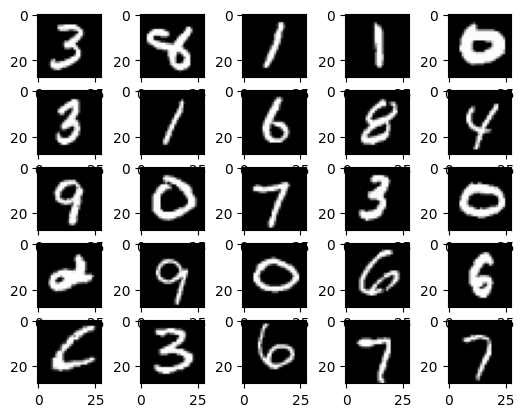

Predicted           Targets
3 4 1 1 0           3 8 1 1 0 
3 1 6 8 4           3 1 6 8 4 
9 0 7 3 0           9 0 7 3 0 
2 9 0 6 6           2 9 0 6 6 
6 3 6 7 7           6 3 6 7 7 


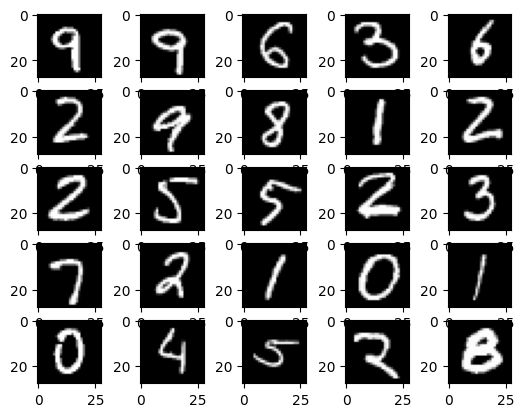

Predicted           Targets
9 9 6 3 6           9 9 6 3 6 
2 9 8 1 2           2 9 8 1 2 
2 5 5 2 3           2 5 5 2 3 
7 2 1 0 1           7 2 1 0 1 
0 4 5 2 0           0 4 5 2 8 


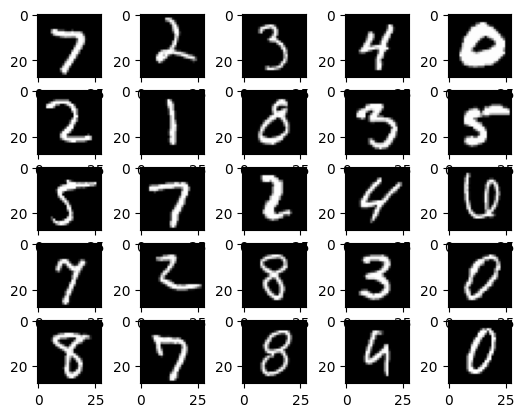

Predicted           Targets
7 2 3 4 0           7 2 3 4 0 
2 1 0 3 5           2 1 8 3 5 
5 7 2 4 0           5 7 2 4 6 
7 2 8 3 0           7 2 8 3 0 
8 7 8 4 0           8 7 8 9 0 


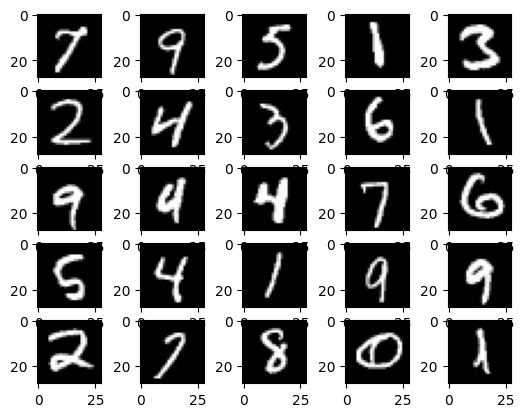

Predicted           Targets
7 9 5 1 3           7 9 5 1 3 
2 4 3 6 1           2 4 3 6 1 
9 4 4 7 6           9 4 4 7 6 
5 4 1 9 9           5 4 1 9 9 
2 7 8 0 1           2 7 8 0 1 


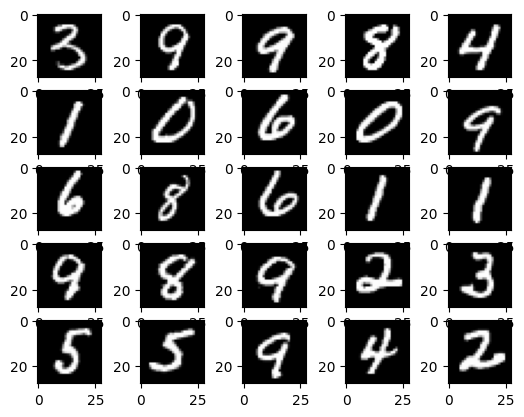

Predicted           Targets
3 9 9 8 4           3 9 9 8 4 
1 0 6 0 9           1 0 6 0 9 
6 8 6 1 1           6 8 6 1 1 
9 8 9 2 3           9 8 9 2 3 
5 5 9 4 2           5 5 9 4 2 


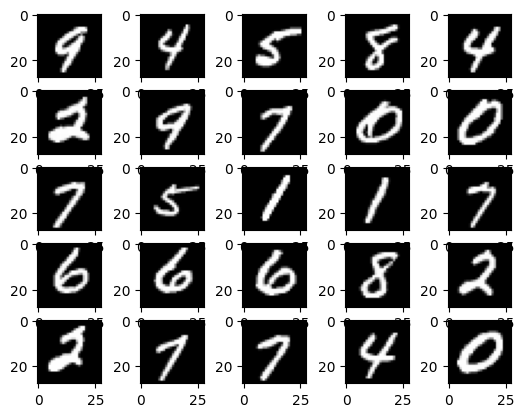

Predicted           Targets
9 4 5 8 4           9 4 5 8 4 
2 9 7 0 0           2 9 7 0 0 
7 5 1 1 7           7 5 1 1 7 
6 6 6 8 2           6 6 6 8 2 
2 7 7 4 0           2 7 7 4 0 


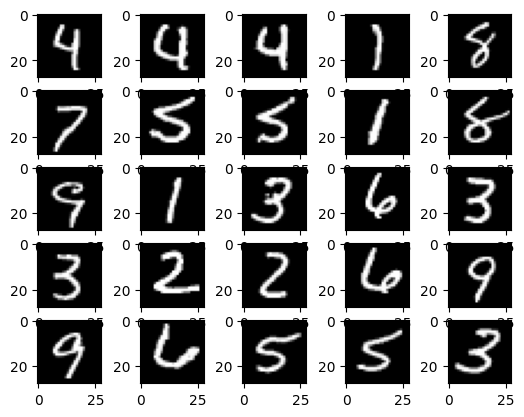

Predicted           Targets
4 4 4 1 8           4 4 4 1 8 
7 5 5 1 8           7 5 5 1 8 
9 1 3 6 3           9 1 3 6 3 
3 2 2 6 9           3 2 2 6 9 
9 6 5 5 3           9 6 5 5 3 


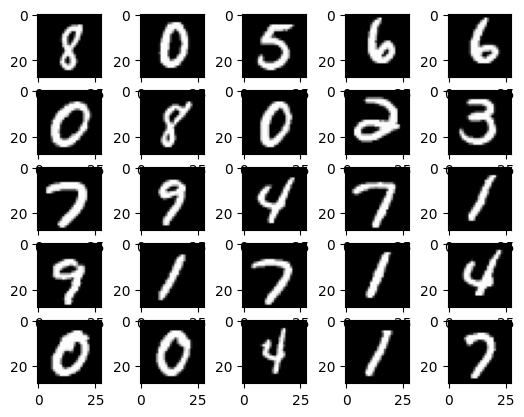

Predicted           Targets
8 0 5 6 6           8 0 5 6 6 
0 8 0 2 3           0 8 0 2 3 
7 9 4 7 1           7 9 4 7 1 
9 1 7 1 4           9 1 7 1 4 
0 0 4 1 7           0 0 4 1 7 


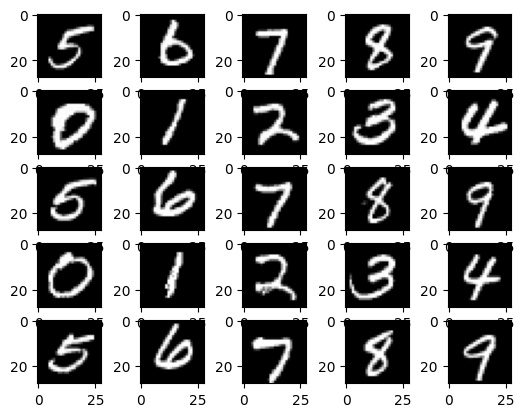

Predicted           Targets
5 6 7 8 9           5 6 7 8 9 
0 1 2 3 4           0 1 2 3 4 
5 6 7 8 9           5 6 7 8 9 
0 1 2 3 4           0 1 2 3 4 
5 6 7 8 9           5 6 7 8 9 


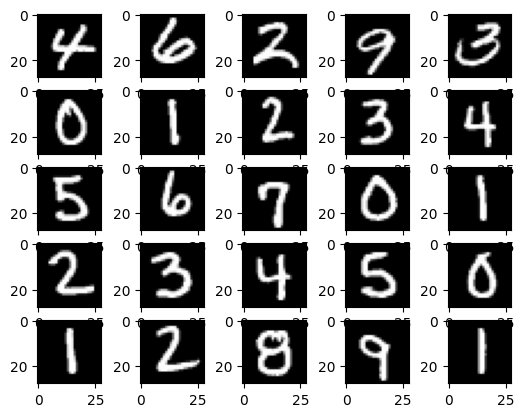

Predicted           Targets
4 6 2 9 3           4 6 2 9 3 
0 1 2 3 4           0 1 2 3 4 
5 6 7 0 1           5 6 7 0 1 
2 3 4 5 0           2 3 4 5 0 
1 2 8 9 1           1 2 8 9 1 


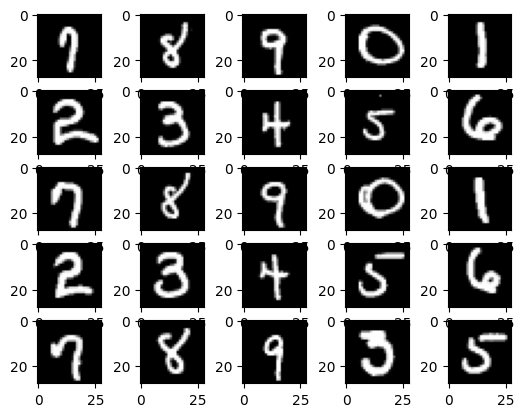

Predicted           Targets
9 8 9 0 1           7 8 9 0 1 
2 3 4 5 6           2 3 4 5 6 
7 6 9 0 1           7 8 9 0 1 
2 3 4 5 6           2 3 4 5 6 
7 8 9 3 5           7 8 9 3 5 


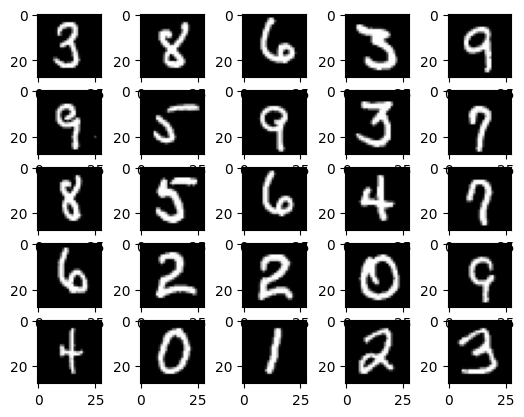

Predicted           Targets
3 8 6 3 9           3 8 6 3 9 
9 5 9 3 7           9 5 9 3 7 
8 5 6 4 7           8 5 6 4 7 
6 2 2 0 9           6 2 2 0 9 
4 0 1 2 3           4 0 1 2 3 


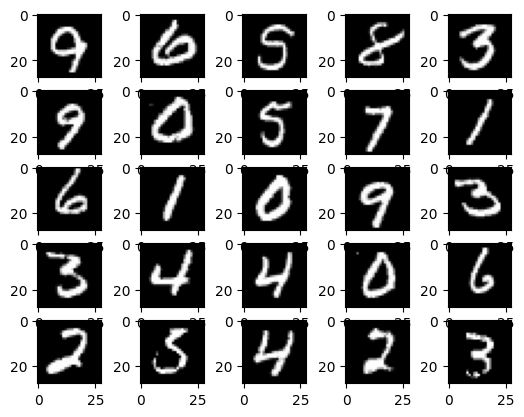

Predicted           Targets
9 6 5 8 3           9 6 5 8 3 
9 0 5 7 1           9 0 5 7 1 
6 1 0 9 3           6 1 0 9 3 
3 4 4 0 6           3 4 4 0 6 
2 5 4 2 3           2 5 4 2 3 


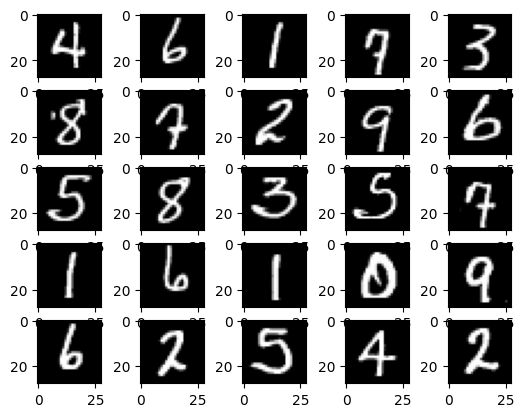

Predicted           Targets
4 6 1 7 3           4 6 1 7 3 
8 7 2 9 6           8 7 2 9 6 
5 8 3 5 7           5 8 3 5 7 
1 6 1 0 9           1 6 1 0 9 
6 2 5 4 2           6 2 5 4 2 


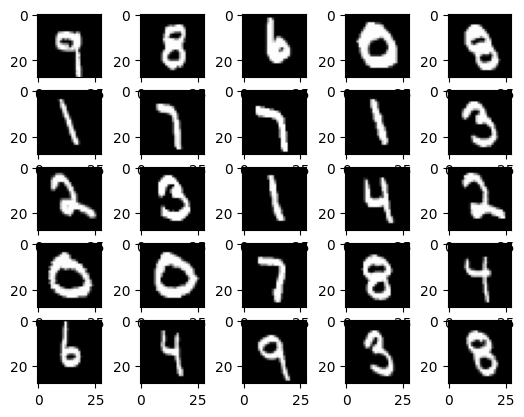

Predicted           Targets
9 8 6 0 8           9 8 6 0 8 
1 7 7 1 3           1 7 7 1 3 
2 3 1 4 2           2 3 1 4 2 
0 0 7 8 4           0 0 7 8 4 
6 4 9 3 8           6 4 9 3 8 


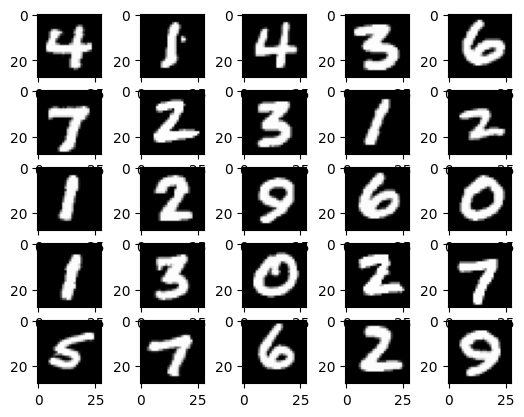

Predicted           Targets
4 1 4 3 6           4 1 4 3 6 
7 2 3 1 2           7 2 3 1 2 
1 2 9 6 0           1 2 9 6 0 
1 3 0 2 7           1 3 0 2 7 
5 7 6 2 9           5 7 6 2 9 


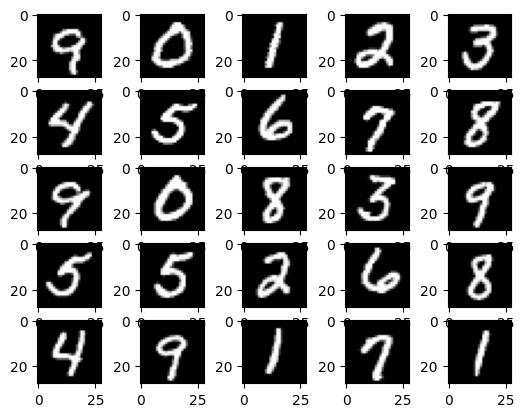

Predicted           Targets
9 0 1 2 3           9 0 1 2 3 
4 5 6 7 8           4 5 6 7 8 
9 0 8 3 9           9 0 8 3 9 
5 5 2 6 8           5 5 2 6 8 
4 9 1 7 1           4 9 1 7 1 


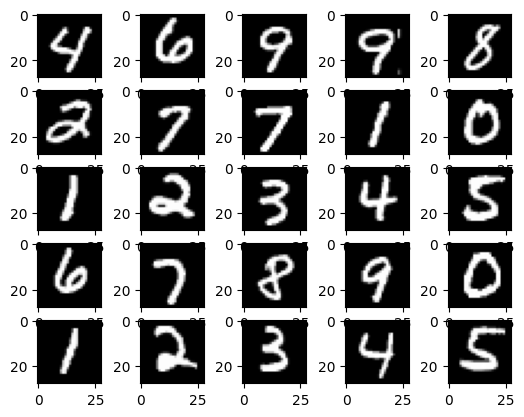

Predicted           Targets
4 6 9 9 8           4 6 9 9 8 
2 7 7 1 0           2 7 7 1 0 
1 2 3 4 5           1 2 3 4 5 
6 7 8 9 0           6 7 8 9 0 
1 2 3 4 5           1 2 3 4 5 


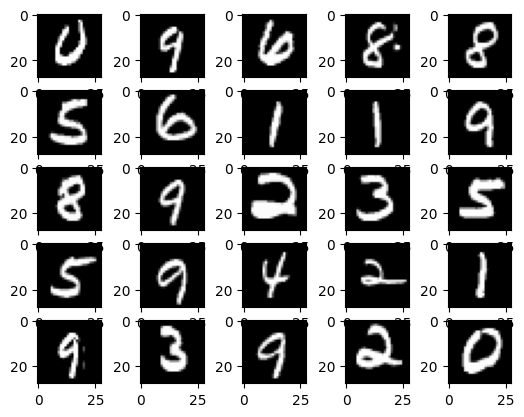

Predicted           Targets
0 9 6 8 8           0 9 6 8 8 
5 6 1 1 9           5 6 1 1 9 
8 9 2 3 5           8 9 2 3 5 
5 9 4 2 1           5 9 4 2 1 
9 3 9 2 0           9 3 9 2 0 


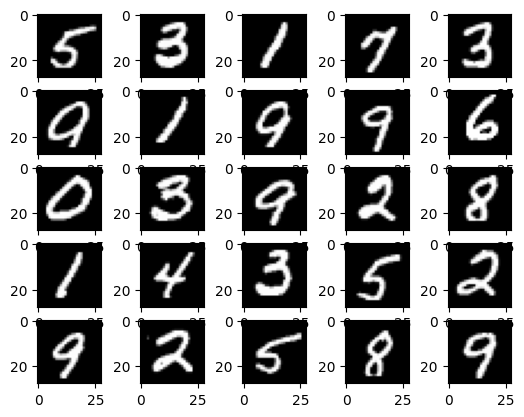

Predicted           Targets
5 3 1 7 3           5 3 1 7 3 
0 1 9 9 6           9 1 9 9 6 
0 3 9 2 8           0 3 9 2 8 
1 4 3 5 2           1 4 3 5 2 
9 2 5 8 9           9 2 5 8 9 


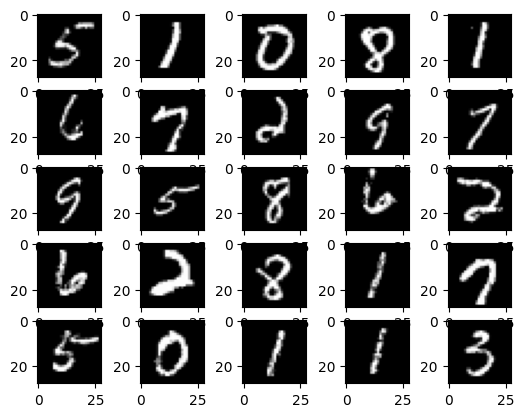

Predicted           Targets
5 1 0 7 1           5 1 0 8 1 
6 7 2 5 7           6 7 2 9 7 
9 5 8 6 2           9 5 8 6 2 
6 2 8 1 7           6 2 8 1 7 
5 0 1 1 3           5 0 1 1 3 


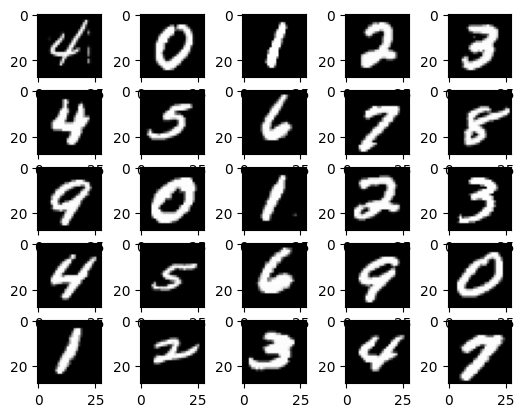

Predicted           Targets
4 0 1 2 3           4 0 1 2 3 
4 5 6 7 8           4 5 6 7 8 
9 0 1 2 3           9 0 1 2 3 
4 5 6 9 0           4 5 6 9 0 
1 2 3 4 7           1 2 3 4 7 


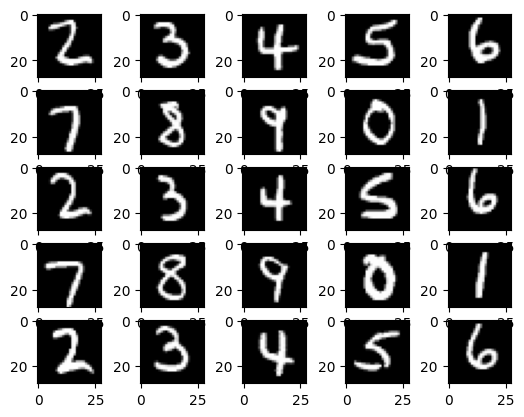

Predicted           Targets
2 3 4 5 6           2 3 4 5 6 
7 8 9 0 1           7 8 9 0 1 
2 3 4 5 6           2 3 4 5 6 
7 8 9 0 1           7 8 9 0 1 
2 3 4 5 6           2 3 4 5 6 


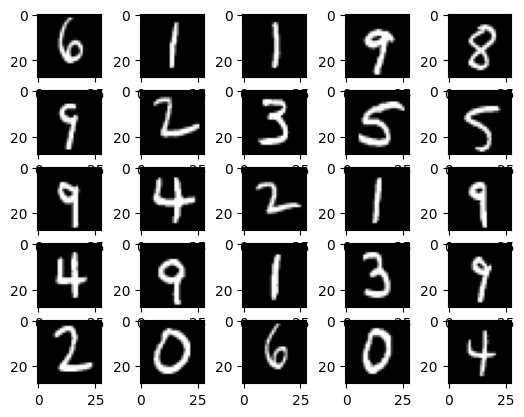

Predicted           Targets
6 1 1 9 8           6 1 1 9 8 
9 2 3 5 5           9 2 3 5 5 
9 4 2 1 9           9 4 2 1 9 
4 9 1 3 9           4 9 1 3 9 
2 0 6 0 4           2 0 6 0 4 


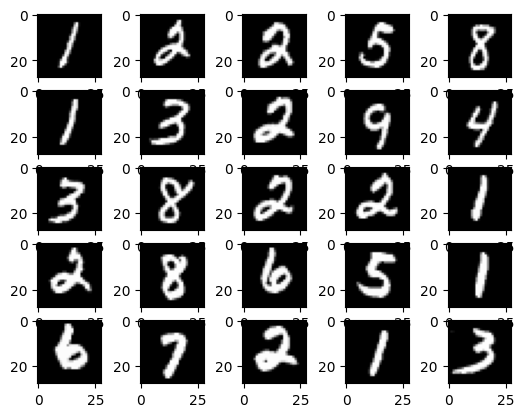

Predicted           Targets
1 2 2 5 8           1 2 2 5 8 
1 3 2 9 4           1 3 2 9 4 
3 8 2 2 1           3 8 2 2 1 
2 8 6 5 1           2 8 6 5 1 
6 7 2 1 3           6 7 2 1 3 


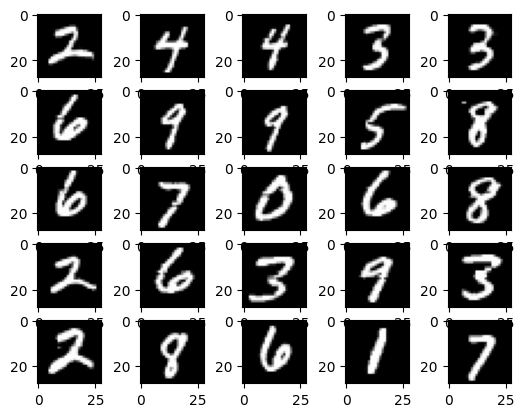

Predicted           Targets
2 4 4 3 3           2 4 4 3 3 
6 9 9 5 8           6 9 9 5 8 
6 7 0 6 8           6 7 0 6 8 
2 6 3 9 3           2 6 3 9 3 
2 8 6 1 7           2 8 6 1 7 


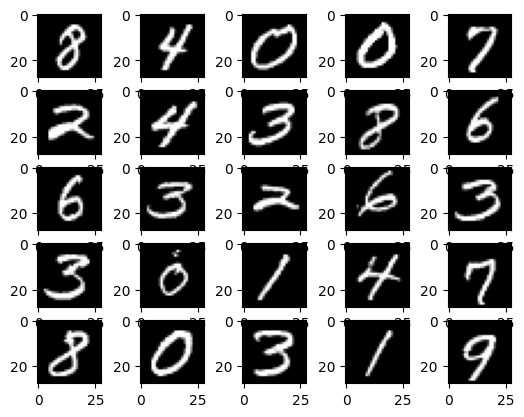

Predicted           Targets
8 4 0 0 7           8 4 0 0 7 
2 4 3 8 6           2 4 3 8 6 
6 3 2 6 3           6 3 2 6 3 
3 0 1 4 7           3 0 1 4 7 
8 0 3 1 9           8 0 3 1 9 


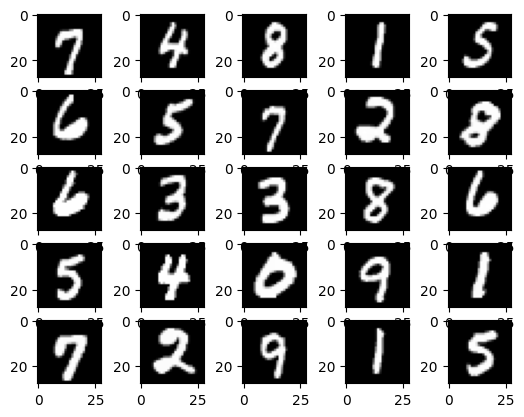

Predicted           Targets
7 4 8 1 5           7 4 8 1 5 
6 5 7 2 8           6 5 7 2 8 
6 3 3 8 6           6 3 3 8 6 
5 4 0 9 1           5 4 0 9 1 
7 2 9 1 5           7 2 9 1 5 


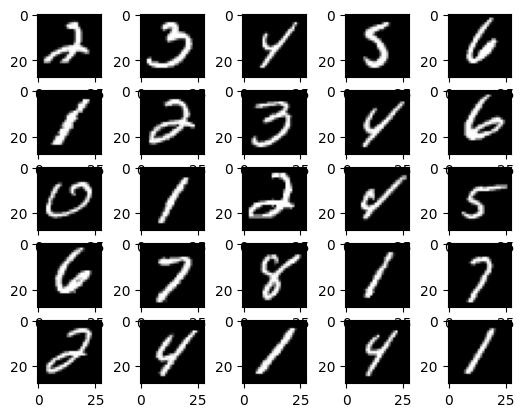

Predicted           Targets
2 3 4 5 6           2 3 4 5 6 
1 2 3 4 6           1 2 3 4 6 
0 1 2 4 5           0 1 2 4 5 
6 7 8 1 7           6 7 8 1 7 
2 4 1 4 1           2 4 1 4 1 


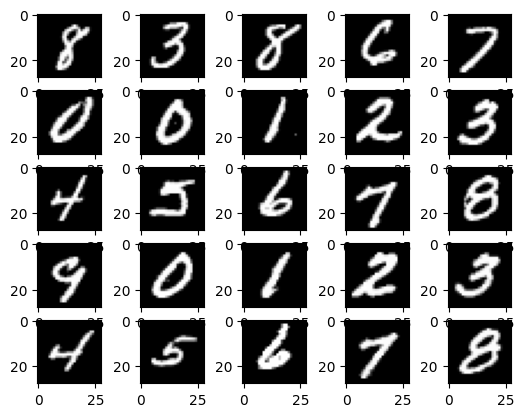

Predicted           Targets
8 3 8 6 7           8 3 8 6 7 
0 0 1 2 3           0 0 1 2 3 
4 5 6 7 0           4 5 6 7 8 
9 0 1 2 3           9 0 1 2 3 
4 5 6 7 8           4 5 6 7 8 


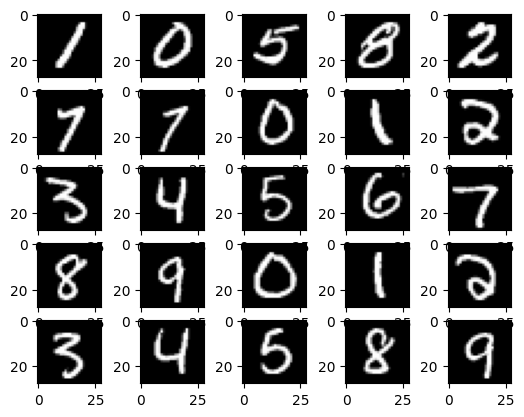

Predicted           Targets
1 0 5 8 2           1 0 5 8 2 
7 7 0 1 2           7 7 0 1 2 
3 4 5 6 7           3 4 5 6 7 
8 9 0 1 2           8 9 0 1 2 
3 4 5 8 9           3 4 5 8 9 


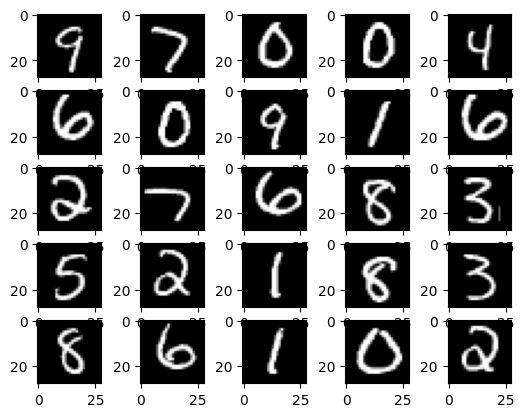

Predicted           Targets
9 7 0 0 4           9 7 0 0 4 
6 0 9 1 6           6 0 9 1 6 
2 7 6 8 3           2 7 6 8 3 
5 2 1 8 3           5 2 1 8 3 
8 6 1 0 2           8 6 1 0 2 


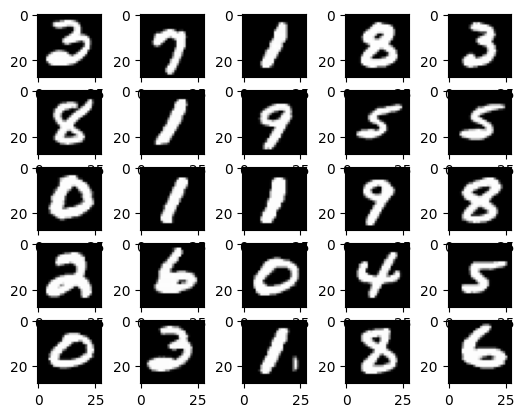

Predicted           Targets
3 7 1 8 3           3 7 1 8 3 
8 1 9 5 5           8 1 9 5 5 
0 1 1 9 8           0 1 1 9 8 
2 6 0 4 5           2 6 0 4 5 
0 3 1 3 6           0 3 1 8 6 


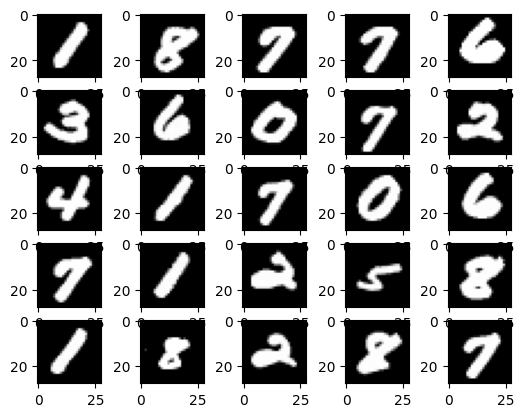

Predicted           Targets
1 8 7 7 6           1 8 7 7 6 
3 6 0 7 2           3 6 0 7 2 
4 1 7 0 6           4 1 7 0 6 
7 1 2 5 8           7 1 2 5 8 
1 6 2 8 7           1 8 2 8 7 


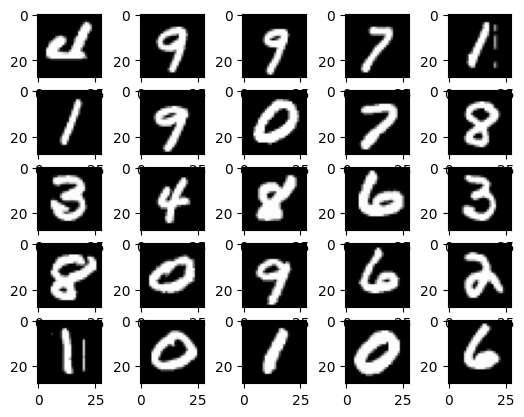

Predicted           Targets
4 9 9 7 1           4 9 9 7 1 
1 9 0 7 8           1 9 0 7 8 
3 4 8 6 3           3 4 8 6 3 
8 0 9 6 2           8 0 9 6 2 
8 0 1 0 6           1 0 1 0 6 


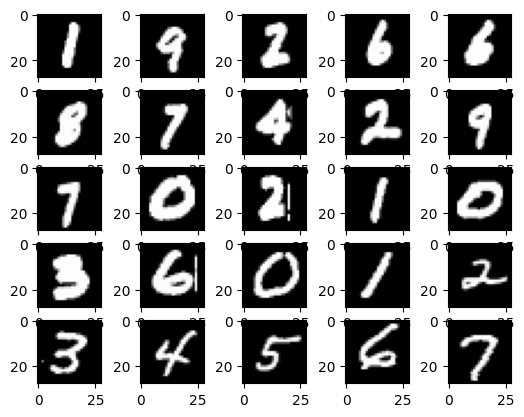

Predicted           Targets
1 9 2 6 6           1 9 2 6 6 
8 7 4 2 9           8 7 4 2 9 
7 0 2 1 0           7 0 2 1 0 
3 6 0 1 2           3 6 0 1 2 
3 4 5 6 7           3 4 5 6 7 


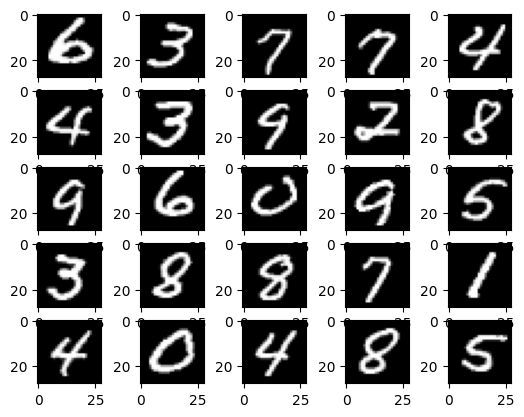

Predicted           Targets
6 3 7 7 4           6 3 7 7 4 
4 3 9 2 8           4 3 9 2 8 
9 6 0 9 5           9 6 0 9 5 
3 8 8 7 1           3 8 8 7 1 
4 0 4 8 5           4 0 4 8 5 


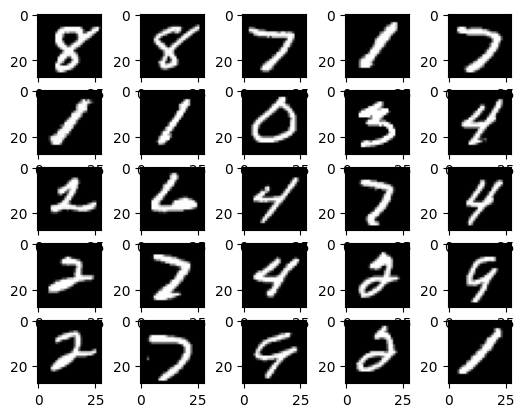

Predicted           Targets
8 8 7 1 7           8 8 7 1 7 
1 1 0 3 4           1 1 0 3 4 
2 4 4 7 4           2 6 4 7 4 
2 7 4 2 9           2 7 4 2 9 
2 7 9 2 1           2 7 9 2 1 


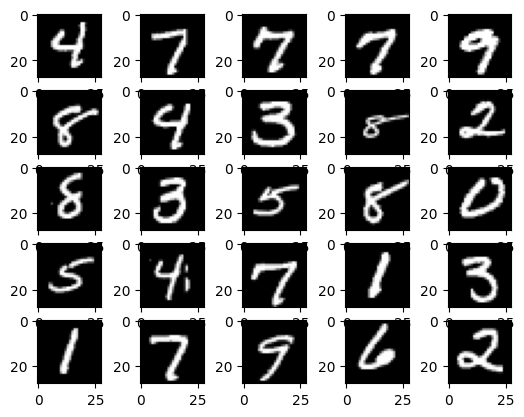

Predicted           Targets
4 7 7 7 9           4 7 7 7 9 
8 9 3 6 2           8 4 3 8 2 
6 3 5 8 0           8 3 5 8 0 
5 4 7 1 3           5 4 7 1 3 
1 7 9 6 2           1 7 9 6 2 


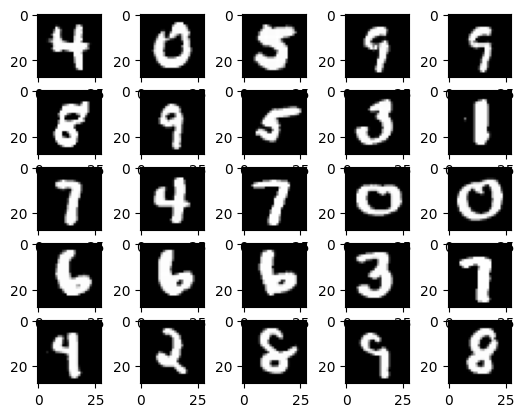

Predicted           Targets
4 0 3 9 9           4 0 5 9 9 
8 9 5 3 1           8 9 5 3 1 
7 4 7 0 0           7 4 7 0 0 
6 6 6 3 3           6 6 6 3 7 
9 2 6 9 8           4 2 8 9 8 


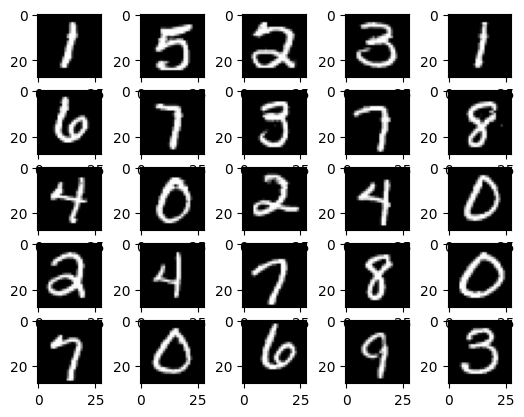

Predicted           Targets
1 5 2 3 1           1 5 2 3 1 
6 7 3 7 8           6 7 3 7 8 
4 0 2 4 0           4 0 2 4 0 
2 4 7 8 0           2 4 7 8 0 
7 0 6 9 3           7 0 6 9 3 


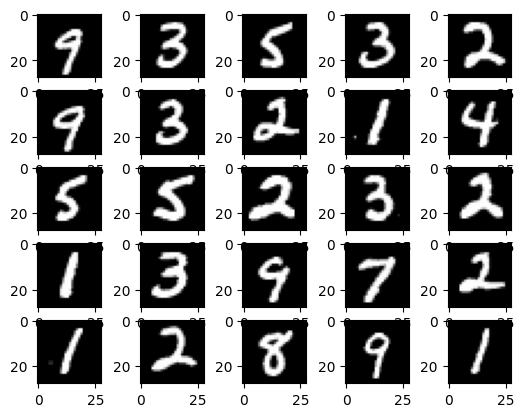

Predicted           Targets
9 3 5 3 2           9 3 5 3 2 
9 3 2 1 4           9 3 2 1 4 
5 5 2 3 2           5 5 2 3 2 
1 3 9 7 2           1 3 9 7 2 
1 2 8 9 1           1 2 8 9 1 


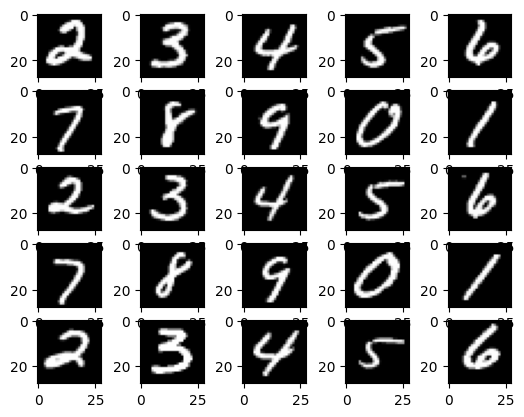

Predicted           Targets
2 3 4 5 6           2 3 4 5 6 
7 8 9 0 1           7 8 9 0 1 
2 3 4 5 6           2 3 4 5 6 
7 8 9 0 1           7 8 9 0 1 
2 3 4 5 6           2 3 4 5 6 


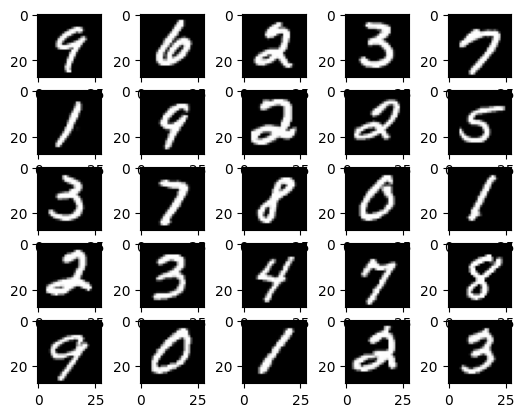

Predicted           Targets
9 6 2 3 7           9 6 2 3 7 
1 9 2 2 5           1 9 2 2 5 
3 7 8 0 1           3 7 8 0 1 
2 3 4 7 8           2 3 4 7 8 
9 0 1 2 3           9 0 1 2 3 


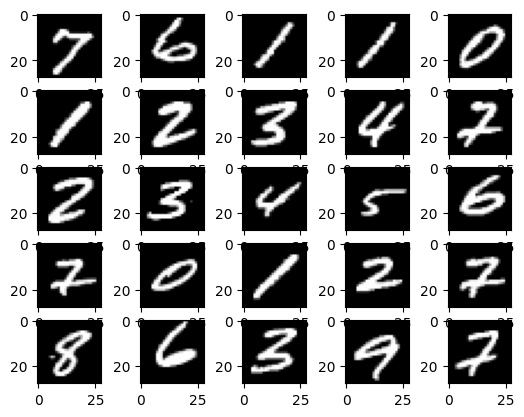

Predicted           Targets
7 6 1 1 0           7 6 1 1 0 
1 2 3 4 2           1 2 3 4 7 
2 3 4 5 6           2 3 4 5 6 
2 0 1 2 7           7 0 1 2 7 
8 6 3 9 2           8 6 3 9 7 


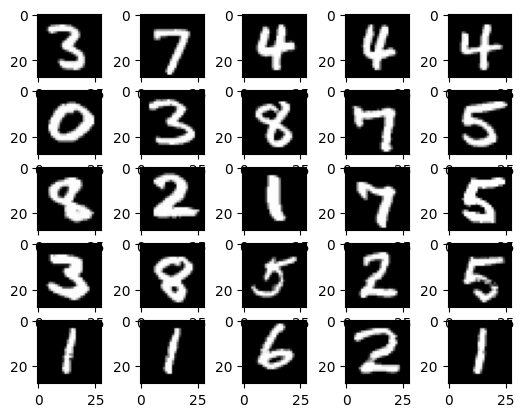

Predicted           Targets
3 7 4 4 4           3 7 4 4 4 
0 3 8 7 5           0 3 8 7 5 
8 2 1 7 5           8 2 1 7 5 
3 8 5 2 5           3 8 5 2 5 
1 1 6 2 1           1 1 6 2 1 


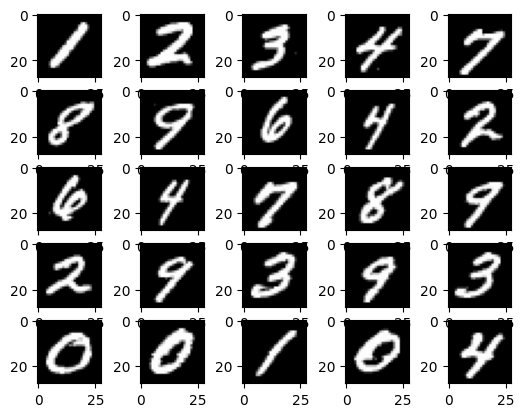

Predicted           Targets
1 2 3 4 7           1 2 3 4 7 
8 9 6 4 2           8 9 6 4 2 
6 4 7 8 9           6 4 7 8 9 
2 9 3 9 3           2 9 3 9 3 
0 0 1 0 4           0 0 1 0 4 


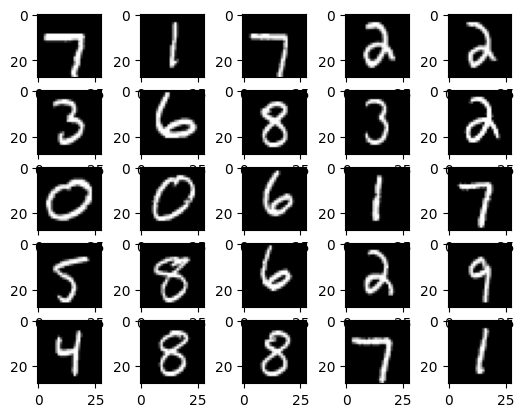

Predicted           Targets
7 1 7 2 2           7 1 7 2 2 
3 6 8 3 2           3 6 8 3 2 
0 0 6 1 7           0 0 6 1 7 
5 3 6 2 9           5 8 6 2 9 
4 8 8 7 1           4 8 8 7 1 


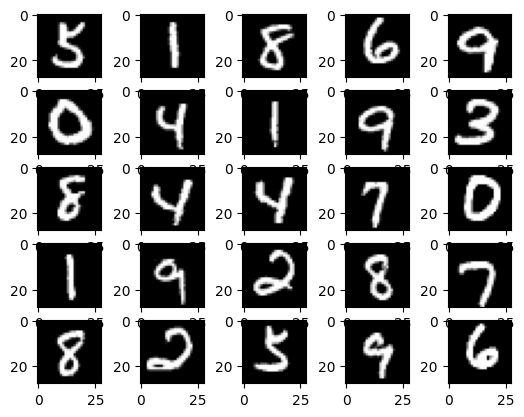

Predicted           Targets
5 1 8 6 9           5 1 8 6 9 
0 4 1 9 3           0 4 1 9 3 
8 4 4 7 0           8 4 4 7 0 
1 9 2 8 7           1 9 2 8 7 
8 2 5 9 6           8 2 5 9 6 


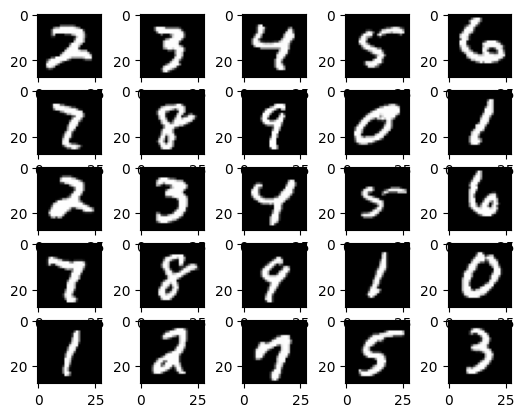

Predicted           Targets
2 3 4 5 6           2 3 4 5 6 
7 8 9 0 1           7 8 9 0 1 
2 3 4 5 6           2 3 4 5 6 
7 8 9 1 0           7 8 9 1 0 
1 2 7 5 3           1 2 7 5 3 


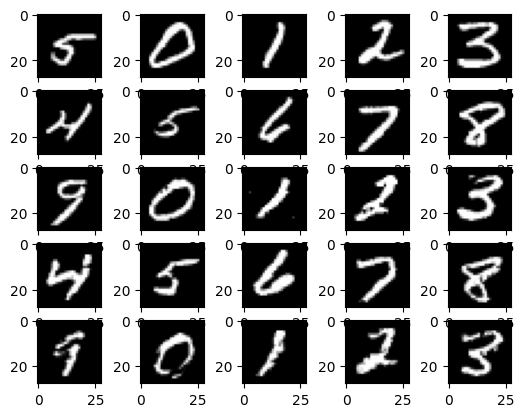

Predicted           Targets
5 0 1 2 3           5 0 1 2 3 
4 5 6 7 8           4 5 6 7 8 
9 0 1 2 3           9 0 1 2 3 
4 5 6 7 8           4 5 6 7 8 
9 0 1 2 3           9 0 1 2 3 


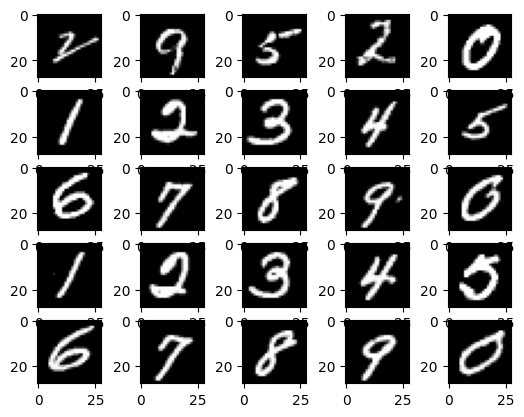

Predicted           Targets
8 9 5 2 0           2 9 5 2 0 
1 2 3 4 5           1 2 3 4 5 
6 7 8 9 0           6 7 8 9 0 
1 2 3 4 0           1 2 3 4 5 
6 7 8 9 0           6 7 8 9 0 


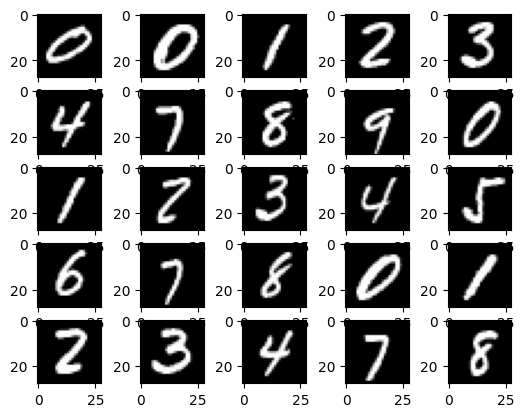

Predicted           Targets
0 0 1 2 3           0 0 1 2 3 
4 7 8 4 0           4 7 8 9 0 
1 2 3 4 5           1 2 3 4 5 
6 7 8 0 1           6 7 8 0 1 
2 3 4 7 8           2 3 4 7 8 


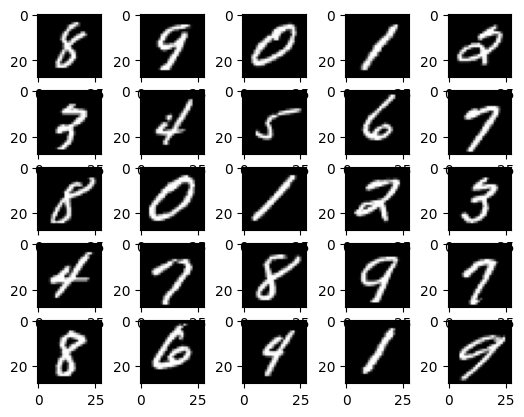

Predicted           Targets
8 9 0 1 0           8 9 0 1 2 
7 4 5 6 7           3 4 5 6 7 
8 0 1 2 3           8 0 1 2 3 
4 7 8 9 7           4 7 8 9 7 
8 6 4 1 9           8 6 4 1 9 


In [7]:
examples = iter(test_loader)
for batch_no in range(100):
    example_data, example_targets = next(examples)

    a = 5      # Number of rows
    b = 5      # Number of images in each row [a*b <= 100]

    for i in range(a*b):
        plt.subplot(a,b,i+1)
        plt.imshow(example_data[i][0], cmap='gray')

    plt.show()    

    example_data = example_data.reshape(-1, 28*28).to(device)
    example_targets = example_targets.to(device)
    outputs2 = model(example_data)
    _2, predicted2 = torch.max(outputs2.data, 1)

    print("Predicted"+b*'  ',"Targets")
    for i in range(a):
        for j in range(b):
            print(predicted2[b*i+j].item(),end=' ')
        print(10*' ',end='')
        for j in range(b):
            print(example_targets[b*i+j].item(),end=' ')
        print()